In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
from sklearn.datasets import load_diabetes

In [36]:
diabetes = load_diabetes()

In [37]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [38]:
X,y = diabetes.data, diabetes.target

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()
X_train = standardScalar.fit_transform(X_train)
X_test = standardScalar.transform(X_test)

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4, 5, 10,15,20,25],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
regressor = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(regressor, param_grid=params, cv=5,scoring='neg_mean_squared_error')

In [44]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [45]:
y_pred = grid.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', grid.score(X_test, y_test))

Mean Squared Error: 4390.125495352313
Mean Absolute Error: 54.00328682224693
Root Mean Squared Error: 66.2580221207388
Accuracy: -4390.125495352313


In [47]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

[Text(0.5, 0.875, 'x[2] <= 0.072\nsquared_error = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.625, 'x[3] <= 0.534\nsquared_error = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 0.118\nsquared_error = 2723.623\nsamples = 170\nvalue = 108.865'),
 Text(0.0625, 0.125, 'squared_error = 2127.833\nsamples = 115\nvalue = 98.896'),
 Text(0.1875, 0.125, 'squared_error = 3327.079\nsamples = 55\nvalue = 129.709'),
 Text(0.375, 0.375, 'x[4] <= -0.324\nsquared_error = 5520.459\nsamples = 39\nvalue = 158.051'),
 Text(0.3125, 0.125, 'squared_error = 4446.914\nsamples = 9\nvalue = 209.556'),
 Text(0.4375, 0.125, 'squared_error = 4807.973\nsamples = 30\nvalue = 142.6'),
 Text(0.75, 0.625, 'x[3] <= 1.198\nsquared_error = 5119.262\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 1.498\nsquared_error = 4966.721\nsamples = 109\nvalue = 190.578'),
 Text(0.5625, 0.125, 'squared_error = 4368.673\

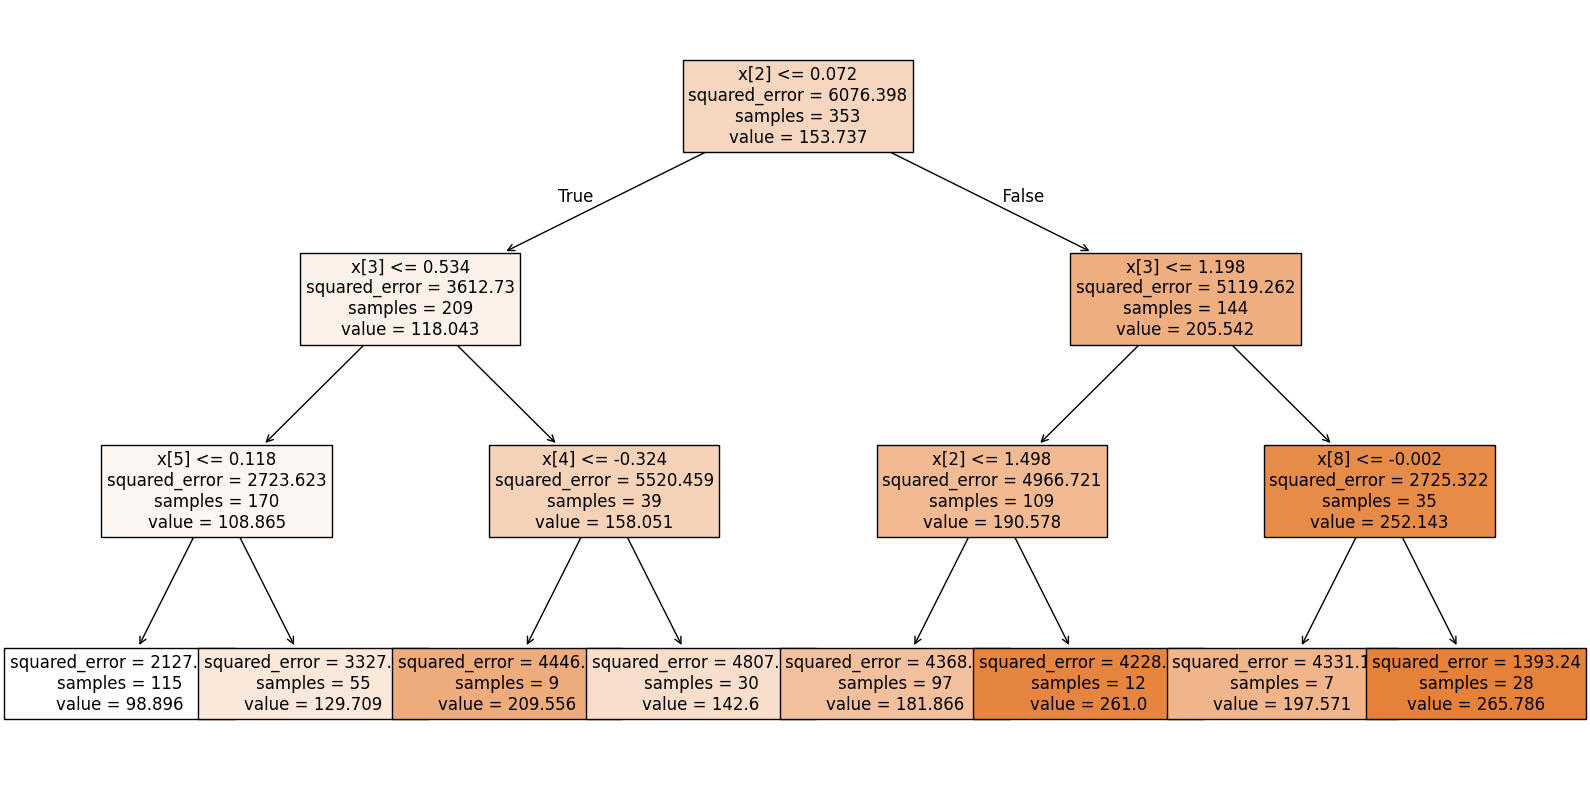

In [48]:
from sklearn import tree 
plt.figure(figsize=(20,10))
tree.plot_tree(grid.best_estimator_, filled=True, fontsize=12)